In [1]:
%matplotlib inline 

from IPython.display import clear_output

import schemdraw as schem
import schemdraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym


    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



# Concept


One dimensional materials are materials with two dimensions much larger than the third so that properties within the materials have negligible variations in the first two dimensions. In this chapter, we focus on the heat transfer inside 1-D solids or fluids at rest (i.e. no convective motion).

Consider a 1D material of dimension $L$, ($0\leq x\leq L$). Imagine that this the wall thickness of a house made of one material. The outside is at constant temperature $T_{w,o}$ and the inside at $T_{w,i}>T_{w,o}$. Typically the owner heats up the house to maintain $T_{w,i}$ and the weather controls $T_{w,o}$. You can view the problem as:
<ol>
<li> the outside air extracts heat from the house,</li>
<li> the house warms the outside air. </li>
</ol>

In any case, there is heat exchange between the outside and inside through the outside and inside surfaces of our wall. This is called <b>heat transfer</b>. Obviously, if inside and outside are at the same temperature, there is no heat transfer. This observation suggests that <b> temperature gradients</b> are necessary for heat transfer to occur. An analog property is the viscous stress in fluid mechanics which can only be non-zero when at least one velocity gradient is non-zero. Another observation that we have all made is that certain material transfer heat more than other: Licking a metal pole on a cold winter day is really bad idea; if the pole was made of wood, the scene below (from the movie A Christmas Story) would not be funny. Of course there is a little more to the story than just temperature of the air.

<img src="AChristmasStory.jpg" alt="my awesome sketch" width=50% >



Each material has a specific <b>thermal conductivity</b>, $k$, or ability to conduct heat. Going back to the wall of our house, with heat flowing or conducting from the inside to the outside, the question is how to quantify heat?

# Heat Flux and Heat Transfer


The guiding principle of heat is basic law of energy: energy must be conserved. Here we are referring to thermal energy or enthalpy:
<p class='alert alert-danger'>
$$
h=\rho C_p T
$$
</p>

where $\rho$ and $C_p$ are the density and the specific heat of the wall material. We now construct a <b>discretized</b> model of the <b>local</b> thermal energy variation in time and space. We divide our wall in $N$ elements with the objective to compute the evolution of temperature (enthalpy) throughout the wall by applying conservation of energy to each element (or control volume).

<img src="Notebook2-1D-cell.png" alt="my awesome sketch" width=50% >

In one element, we define the temperature at the center, as the average temperature over the entire cell. Since we limit our present discussion to 1D, the total enthalpy over the cell is $h\Delta x\Delta y\Delta z$. The conservation of energy dictates that
<p class='alert alert-danger'>
$$
\left[\begin{array}{1}
\text{growth or decay of}\\
\text{enthalpy over time}
\end{array}
\right] = 
\left[\text{energy coming in}\right] - \left[\text{energy going out}\right]+\left[\text{internal energy sources}\right]
$$
</p>
where **internal energy sources** may be heat production or destruction from chemical reactions, mechanical systems (friction) or electrical resistance. Here after the total internal energy source per unit volume is defined as $\dot{q}$

The left hand side can simply be interpreted as
$$
\frac{h(x_i,t+\Delta t)-h(x_i,t)}{\Delta t}\Delta x\Delta y\Delta z=\rho C_p\frac{T(x_i,t+\Delta t)-T(x_i,t)}{\Delta t}\Delta x\Delta y\Delta z
$$



In the light of the previous discussion, we shall now derive an expression of the energy going in and out (RHS of the conservation energy). We speculated before that heat transfer should be related to temperature gradient, for instance at the interface between cell $i$ and $i+1$, this gradient is
$$
\frac{T(x_{i+1},t)-T(x_i,t)}{x_{i+1}-x_{i}}=\frac{T(x_{i+1},t)-T(x_i,t)}{\Delta x}
$$
This is an approximation of the temperature gradient that becomes exact when $\Delta x\rightarrow 0$.

How does the heat flow? It is sort of a philosiphical question. Does the cold air cool the house or does the inside of the house warms the air? Let's be practical: We need energy to keep our houses warm in the water, so the heat appears to escape the house. The transport heat is therefore <b>against</b> the gradient of temperature. We therefore define the <b>heat flux</b>
$$
q''(x_{i+1/2},t)=-k\frac{T(x_{i+1},t)-T(x_i,t)}{\Delta x}
$$
as our energy in or out. The thermal conductivity $k$ is material dependent and necessary to achieve the dimensions of an energy flux (W/m<sup>2</sup>). The heat rate across the interface at $x_{i+1/2}$ is the integral over the surface area. Assuming (thanks to 1D) that $q''$ is constant over that surface, the <b>heat rate</b> is
$$
q(x_{i+1/2},t)=-k\frac{T(x_{i+1},t)-T(x_i,t)}{\Delta x}\Delta y\Delta z
$$
The units of $k$ are therefore <b>W/(m.K)</b>. Temperature can be expressed here in Kelvin or degree Centigrade (since this is a difference) but <b>not in Farhenheit</b>. From now on we will stick to Kelvin and Centigrade as much as possible.

Our balance of energy now becomes:
$$
\begin{split}
&\rho C_p\frac{T(x_i,t+\Delta t)-T(x_i,t)}{\Delta t}\Delta x\Delta y\Delta z\\
&-\left(-k\frac{T(x_{i},t)-T(x_{i-1},t)}{\Delta x}\right)\Delta y\Delta z+\left(-k\frac{T(x_{i+1},t)-T(x_i,t)}{\Delta x}\right)\Delta y\Delta z=\dot{q}\Delta x\Delta y\Delta z
\end{split}
$$
which can be recast as:
$$
\rho C_p \frac{T(x_i,t+\Delta t)-T(x_i,t)}{\Delta t}\Delta x\Delta y\Delta z=k\frac{T(x_{i+1},t)-2T(x_i,t)+T(x_{i-1},t)}{\Delta x}\Delta y\Delta z+\dot{q}
$$
and simplified to 
$$
\rho C_p \frac{T(x_i,t+\Delta t)-T(x_i,t)}{\Delta t}=k\frac{T(x_{i+1},t)-2T(x_i,t)+T(x_{i-1},t)}{\Delta x^2}+\dot{q}
$$
In the absence of heat generation, or internal energy source ($\dot{q}=0$). The steady state solution is independent of time, hence the governing equation of each cell in our wall:
$$
-T(x_{i+1},t)+2T(x_i,t)-T(x_{i-1},t)=0
$$
How do we solve this problem? The solution at $x_i$ depends on the solution at $x_{i+1}$ and $x_{i-1}$, which imposes that we treat the problem as a compact system of equations written in a matrix form:
$$
\left(\begin{array}{cccccccccc}
1 & 0 & 0 & \ldots & \ldots& \ldots & 0\\
-1  & 2 & -1 & \ddots &  & &   \vdots\\
0& \ddots & \ddots & \ddots& \ddots&  & \vdots\\
\vdots &\ddots & -1 & 2 & -1 & \ddots &  \vdots\\
\vdots  & &\ddots & \ddots &\ddots &\ddots & 0\\
\vdots & & & \ddots &-1 & 2 & -1 \\
0 & \ldots & \ldots & \ldots & 0 &0 & 1\\
\end{array}
\right)\cdot
\left(\begin{array}{c}
T(x_{0})\\
T(x_{1})\\
\vdots \\
T(x_{i})\\
\vdots \\
T(x_{N-2})\\
T(x_{N-1})
\end{array}
\right)=
\left(\begin{array}{c}
T_{w,i}\\
0\\
\vdots \\
\vdots \\
\vdots \\
0\\
T_{w,o}
\end{array}
\right)
$$

<function matplotlib.pyplot.show(close=None, block=None)>

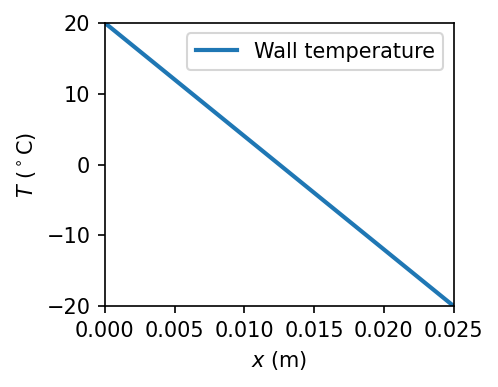

In [2]:


import matplotlib.pyplot as plt
import numpy as np

L = 0.025 #wall thickness is 2.5 cm
N = 5 # Number of cells in the wall
Ti = 20. #
To = -20. #
dx = float(L)/float(N-1) #cell size
x = np.array([i*dx for i in range(N)])
A = np.zeros((N, N))     # pre-allocate [A] array
b = np.zeros((N, 1))     # pre-allocate {b} column vector

A[0, 0] = 1.
b[0, 0] = Ti
A[N-1,N-1] = 1.
b[N-1,0] = To

for i in range(1, N-1):
    A[i, i-1] = -1   # node-1
    A[i, i] = 2     # node
    A[i, i+1] = -1   # node+1
    
#print('A \n', A)
#print('B \n', b)

#---- Solve using numpy.linalg.solve

T = np.linalg.solve(A, b)     # solve A*x = B for x

#print('T \n', T)

plt.figure(figsize=(3,2.5), dpi=150)
plt.plot(x,T, lw=2, label='Wall temperature')
plt.xlim([0,L])
plt.ylim([To,Ti])
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ ($^\circ$C)')
plt.legend()
plt.show


How is the distribution of temperature inside our wall? Use the code to change the inside and/or outside temperature, is the distribution other than linear? Increase the number of cells inside the wall, do you see any change?

Using our intuitive approach and a model of the heat flux, our simulation suggests that the temperature distribution is linear inside our wall resulting in the following heat flux
<p class='alert alert-danger'>
$$
q''=-k\frac{T_{w,i}-T_{w,o}}{L}
$$
</p>
and the heat transfer rate is $q=q''A$ where $A$ is the surface area of the wall. Heat flux is defined by a phenomologic law, called <b>Fourier's law</b> which was derived from observations and experiments. Fourier's law in 3D is
<p class='alert alert-danger'>
$$
\vec{q}''=-k\vec{\nabla}T=-k\left(\begin{array}{c}\frac{\partial T}{\partial x}\\\frac{\partial T}{\partial y}\\\frac{\partial T}{\partial z}\end{array}\right)
$$
</p>
and for one dimension problem:
<p class='alert alert-danger'>
$$
q''=-k\frac{dT}{dx}
$$
</p>

Consider now a practical application. Pinewood has a thermal conductivity of 0.26 $\text{W}/\text{m}.\text{K}$. The heat transfer rate through a one squared meter wood panel is 260 W. For an insulating material (fiberglass-type) with a thermal conductivity of 0.035 $\text{W}/\text{m}.\text{K}$, the heat transfer rate drops to 35 W. 

The problem is that one cannot build houses out of insulation material. Now consider a wall is 2.5cm of wood and 1cm of insulation. The wall is no longer homogenous: 2.5cm of the domain has a thermal conductivity of 0.26, the rest has a thermal conductivity of 0.035. Let us assume that for <b>1D steady-state conduction</b> the heat flux <b>within the same material</b> of thermal conductivity $k$ between point $a$ and $b$ separated by a length $L$ is
$$
q''=-k\frac{T_a-T_b}{L}
$$
We are here assuming that the distribution of temperature is linear between $a$ and $b$.

Conservation of energy imposes that the same energy (heat) flowing through the wood has to flow through the insulation. Our system is 1D so the energy is nowhere to go but through the walls and it needs to be conserved! (Yes I am repeating myself, I am just making sure you remember that energy is always conserved). The equality of heat flux writes:
$$
q_\text{wood}''=q_\text{insulation}'' \Rightarrow -k_\text{wood}\frac{T_{w,i}-T_1}{L_\text{wood}}=-k_\text{insulation}\frac{T_1-T_{w,o}}{L_\text{insulation}}
$$
which leads to the determination of the interface temperature $T_1$
$$
T_1=\frac{1}{\frac{k_\text{wood}}{L_\text{wood}}+\frac{k_\text{insulation}}{L_\text{insulation}}}\left(\frac{k_\text{wood}}{L_\text{wood}}T_{w,i}+\frac{k_\text{insulation}}{L_\text{insulation}}T_{w,o}\right)
$$
The temperature distribution is plotted below and the heat flux is calculated.


Heat rate through wall: 65.47 W


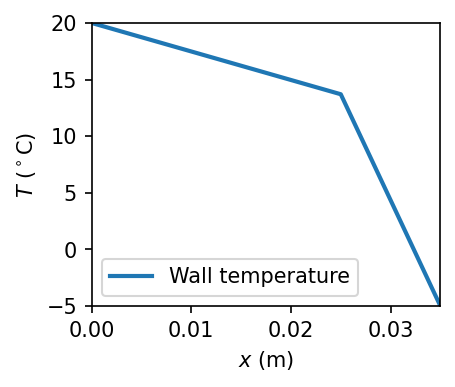

In [3]:
import math
k_wood=0.26 #W/(m.K)
k_insulation=0.035 #W/(m.K)
L_wood=0.025 #m
L_insulation=0.01 #m
L_wall=L_wood+L_insulation
T_wi=20. #C
T_wo=-5. #C
Area=1. #m^2
x=np.array([0., L_wood, L_wall])
T_1=(k_wood/L_wood*T_wi+k_insulation/L_insulation*T_wo)/(k_wood/L_wood+k_insulation/L_insulation)
T=np.array([T_wi, T_1, T_wo])
plt.figure(figsize=(3,2.5), dpi=150)
plt.plot(x,T, lw=2, label='Wall temperature')
plt.xlim([0,L_wall])
plt.ylim([T_wo,T_wi])
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ ($^\circ$C)')
plt.legend()
plt.show
q_wall=k_wood/L_wood*(T_wi-T_1)*Area
print ('Heat rate through wall: {0:.2f} W'.format(q_wall))

This is still a lousy house. What would the heat rate be if we add sheetrock on the inside and bricks on the outside?

To summarize, we have 1cm of sheetrock (sr) with $k_{sr}=0.10$W/(m.K), 2.5cm of pinewood (pw), 1cm of insulation (in) and 5 cm of brick (br) with $k_{br}=0.6$W/(m.K). The system of equations for <b>heat rate</b> is
\begin{eqnarray}
-\frac{k_\text{sr}A}{L_\text{sr}}\left(T_{w,i}-T_1\right)&=&
-\frac{k_\text{pw}A}{L_\text{pw}}\left(T_1-T_2\right)\\
-\frac{k_\text{pw}A}{L_\text{pw}}\left(T_1-T_2\right)&=&
-\frac{k_\text{in}A}{L_\text{in}}\left(T_2-T_3\right)\\
-\frac{k_\text{in}A}{L_\text{in}}\left(T_2-T_3\right)&=&
-\frac{k_\text{br}A}{L_\text{br}}\left(T_3-T_{w,o}\right)
\end{eqnarray}
We now define the following
\begin{eqnarray}
R_\text{sr}&=&\frac{L_\text{sr}}{k_\text{sr}A}\\
R_\text{pw}&=&\frac{L_\text{pw}}{k_\text{pw}A}\\
R_\text{in}&=&\frac{L_\text{in}}{k_\text{in}A}\\
R_\text{br}&=&\frac{L_\text{br}}{k_\text{br}A}
\end{eqnarray}
and explain later why. We can recast the system into a matrix form
$$
\left(\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0\\
-\frac{1}{R_\text{sr}} & \frac{1}{R_\text{sr}}+\frac{1}{R_\text{pw}} & -\frac{1}{R_\text{pw}} & 0 & 0 \\
0 & -\frac{1}{R_\text{pw}} & \frac{1}{R_\text{pw}}+\frac{1}{R_\text{in}} & -\frac{1}{R_\text{in}} &0 \\
0 & 0 & -\frac{1}{R_\text{in}} & \frac{1}{R_\text{in}}+\frac{1}{R_\text{br}} & \frac{1}{R_\text{br}} \\
0 & 0 & 0 & 0&  1
\end{array}\right)
\left(\begin{array}{c}
T_{w,i}\\
T_1\\
T_2\\
T_3\\
T_{w,o}
\end{array}\right)=
\left(\begin{array}{c}
20\\
0\\
0\\
0\\
-5
\end{array}\right)
$$

[[  1.    0.    0.    0.    0. ]
 [-10.   20.4 -10.4   0.    0. ]
 [  0.  -10.4  13.9  -3.5   0. ]
 [  0.    0.   -3.5  15.5 -12. ]
 [  0.    0.    0.    0.    1. ]]
[[25.        ]
 [19.69215813]
 [14.58846403]
 [-0.57679844]
 [-5.        ]]
Heat rate through wall in sr: 53.08 W
Heat rate through wall in pw: 53.08 W
Heat rate through wall in in: 53.08 W
Heat rate through wall in br: 53.08 W


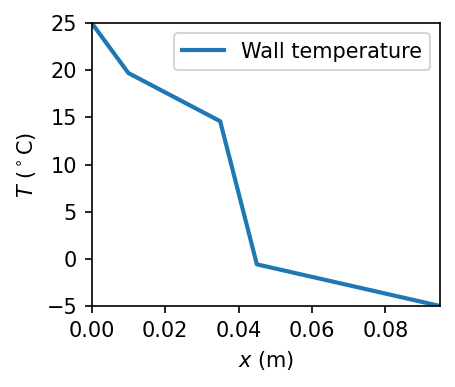

In [4]:
k_sr=0.1
L_sr=0.01
k_pw=0.26
L_pw=0.025
k_in=0.035
L_in=0.01
k_br=0.6
L_br=0.05
Area=1.
T_wi=25.
T_wo=-5.
R_sr=L_sr/(k_sr*Area)
R_pw=L_pw/(k_pw*Area)
R_in=L_in/(k_in*Area)
R_br=L_br/(k_br*Area)
A = np.zeros((5, 5))
b = np.zeros((5, 1))
A[0, 0] = 1.
b[0, 0] = T_wi
A[1,0] = -1./R_sr
A[1,1] = 1./R_sr+1./R_pw
A[1,2] = -1./R_pw
A[2,1] = -1./R_pw
A[2,2] = 1./R_pw+1./R_in
A[2,3] = -1./R_in
A[3,2] = -1./R_in
A[3,3] = 1./R_in+1./R_br
A[3,4] = -1./R_br
A[4,4] = 1.
b[4,0] = T_wo
print(A)

T = np.linalg.solve(A, b)
print(T)
x = np.zeros((5,1))
x[1,0] = L_sr
x[2,0] = x[1,0]+L_pw
x[3,0] = x[2,0]+L_in
x[4,0] = x[3,0]+L_br

L=x[4,0]

plt.figure(figsize=(3,2.5), dpi=150)
plt.plot(x,T, lw=2, label='Wall temperature')
plt.xlim([0,L])
plt.ylim([T_wo,T_wi])
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ ($^\circ$C)')
plt.legend()
plt.show

q_wall=(T_wi-T[1,0])/R_sr
print ('Heat rate through wall in sr: {0:.2f} W'.format(q_wall))
q_wall=(T[1,0]-T[2,0])/R_pw
print ('Heat rate through wall in pw: {0:.2f} W'.format(q_wall))
q_wall=(T[2,0]-T[3,0])/R_in
print ('Heat rate through wall in in: {0:.2f} W'.format(q_wall))
q_wall=(T[3,0]-T[4,0])/R_br
print ('Heat rate through wall in br: {0:.2f} W'.format(q_wall))

The significance of 
<p class='alert alert-danger'>
$$
R=\frac{L}{kA}
$$
</p>
comes from the analogy between heat rate, temperature, thermal conductivity and current $I$, potential difference $\Delta V$, and conductivity $\sigma$. Ohm's law in a wire of area $A$ and length $L$ between points $1$ and $2$ states that
$$
V_1-V_2=R I\text{ with }R=\frac{L}{\sigma A}\text{ or } I=\frac{\Delta V}{R}
$$

In heat transfer $R$ is the <b>thermal resistance</b>
<p class='alert alert-danger'>
$$
R=\frac{\Delta T}{q}
$$
</p>
In the case of composite materials, such as the one we have just computed, the total resistance is the sum of all the resistance
<p class='alert alert-danger'>
$$
R_\text{tot}=\sum_{i=0}^{N-1}R_i
$$
</p>
and the heat rate through the wall is 
<p class='alert alert-danger'>
$$
q=\frac{T_0-T_{N-1}}{R_\text{tot}}
$$
</p>
If you are not concerned by the temperature distribution through the wall, this method is faster than the matrix one.

For heat transfer per unit surface area, or heat flux, the thermal resistance for a plane wall is defined as
$$
R''=\frac{L}{k}
$$

In [6]:
R_tot=R_sr+R_pw+R_in+R_br
q_wall=(T_wi-T_wo)/R_tot
print ('Heat rate through wall using the total thermal resistance: {0:.2f} W'.format(q_wall))

Heat rate through wall using the total thermal resistance: 53.08 W


## What you need to remember

* Units of thermal conductivity
* **Fourier's law** (not only because Fourier is French and lived in Grenoble)
* The following definitions and units
    * **Heat flux**: heat transfer per unit surface area $q''\, [W/m^2]$
    * **Heat rate per unit length**: $q'\, [W/m]$
    * **Heat rate**: $q\, [W]$
* Conservation of energy applied to a solid or a volume of fluid at rest
* There is a analogy between heat transfer and electricity. 